In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from PIL import Image
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Convolution2D, Dropout, Input, GlobalAveragePooling2D, MaxPooling2D, Flatten, Dense# Sequential model for building a linear stack of layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive/My\ Drive/images.zip

Streaming output truncated to the last 5000 lines.
  inflating: real_vs_fake/real-vs-fake/valid/real/34832.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34836.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34839.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34847.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34848.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34852.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34861.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34864.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34868.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34877.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34883.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34887.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34891.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34894.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34904.jpg  
  inflating: real_v

# Code


In [ ]:
sys.path.append('/content/drive/MyDrive/face2face/functions')

In [ ]:
from create_dataframe import create_df

In [ ]:
train_meta = create_df('train')
valid_meta = create_df('valid')
test_meta = create_df('test')

In [ ]:
# Specify the base path where your image data is stored
base_path = '/content/real_vs_fake/real-vs-fake/'


# Create an ImageDataGenerator for image preprocessing and augmentation
image_gen = ImageDataGenerator(rescale=1./255.,
                               horizontal_flip=True)

In [ ]:
Custom_train = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=128,
    class_mode='binary'
)
Custom_valid = image_gen.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size=128,
    class_mode='binary'
)
Custom_test = image_gen.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=128,
    class_mode='binary',
    shuffle=False
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [ ]:
classifier = Sequential()
classifier.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
classifier.add(MaxPooling2D((2, 2)))
classifier.add(Convolution2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D((2,2)))
classifier.add(Convolution2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D((2,2)))
classifier.add(Flatten())
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(1, activation='sigmoid')) # Binary classification, use 'softmax' for multi-class
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

In [ ]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = classifier.fit(Custom_train, epochs=10, validation_data=(Custom_valid))

Epoch 1/10
782/782 [==============================] - 290s 357ms/step - loss: 0.5117 - accuracy: 0.7437 - val_loss: 0.4129 - val_accuracy: 0.8110
Epoch 2/10
782/782 [==============================] - 279s 357ms/step - loss: 0.3361 - accuracy: 0.8541 - val_loss: 0.2792 - val_accuracy: 0.8826
Epoch 3/10
782/782 [==============================] - 278s 355ms/step - loss: 0.2432 - accuracy: 0.8988 - val_loss: 0.2306 - val_accuracy: 0.9050
Epoch 4/10
782/782 [==============================] - 277s 355ms/step - loss: 0.1856 - accuracy: 0.9245 - val_loss: 0.2039 - val_accuracy: 0.9205
Epoch 5/10
782/782 [==============================] - 277s 355ms/step - loss: 0.1533 - accuracy: 0.9397 - val_loss: 0.1714 - val_accuracy: 0.9327
Epoch 6/10
782/782 [==============================] - 276s 353ms/step - loss: 0.1288 - accuracy: 0.9507 - val_loss: 0.1599 - val_accuracy: 0.9380
Epoch 7/10
782/782 [==============================] - 276s 353ms/step - loss: 0.1061 - accuracy: 0.9591 - val_loss: 0.1769 -

In [ ]:
import pickle
with open('/content/drive/MyDrive/face2face/models/Custom_history.pkl', 'wb') as f:
  pickle.dump(history.history, f)
with open('/content/drive/MyDrive/face2face/models/Custom.pkl', 'wb') as f:
    pickle.dump(classifier, f)

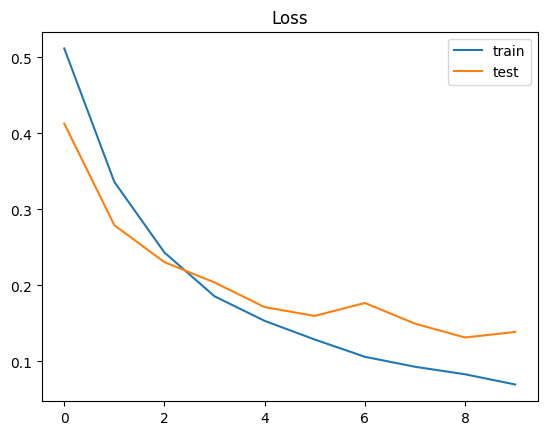

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title('Loss')
plt.show()

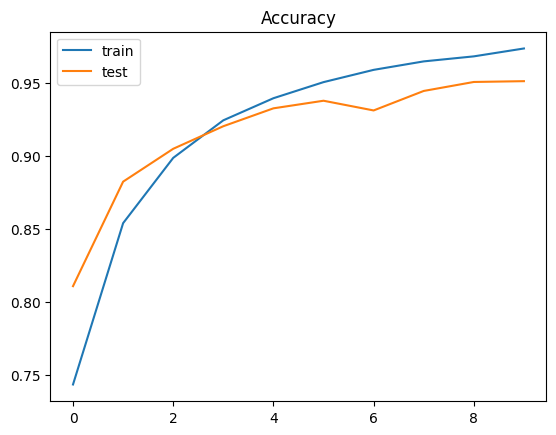

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.title('Accuracy')
plt.show()

In [ ]:
classifier.evaluate(Custom_test)

157/157 [==============================] - 46s 293ms/step - loss: 0.1298 - accuracy: 0.9523


[0.12983109056949615, 0.9523000121116638]

In [ ]:
y_true = Custom_test.classes
y_pred = classifier.predict(Custom_test)

157/157 [==============================] - 45s 287ms/step


In [ ]:
y_pred_labels = (y_pred > 0.5).astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
cm = confusion_matrix(y_true, y_pred_labels)

In [ ]:
Custom_metrics = classification_report(y_true, y_pred_labels)

In [ ]:
print(Custom_metrics)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10000
           1       0.96      0.94      0.95     10000

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



In [ ]:
with open('/content/drive/MyDrive/face2face/models/Custom.pkl', 'rb') as f:
    data = pickle.load(f)

In [ ]:
accuracy = accuracy_score(y_true, y_pred_labels)
precision = precision_score(y_true, y_pred_labels)
recall = recall_score(y_true, y_pred_labels)
f1 = f1_score(y_true, y_pred_labels)

In [ ]:
metrics_list = [accuracy, precision, recall, f1]

(0.95115, 0.9616289777959685, 0.9398, 0.9505891872755778)

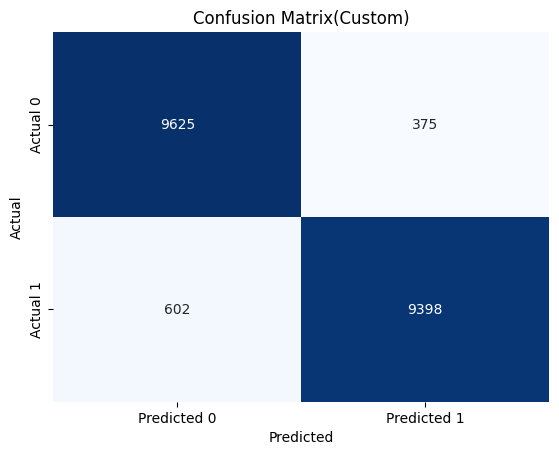

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix(Custom)")
plt.show()